In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [3]:
df1=pd.read_csv("Wholesale+Customers+Data.csv")
df1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

## Approach
Since we would like to determine the channel and region's expenditure, we should group by each of the channels and regions and find the total annual spendings of all the variety of goods.  

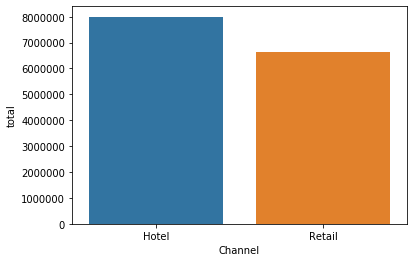

In [4]:
dft=df1.drop("Buyer/Spender",axis=1)
dft["total"]=dft.sum(axis=1)
dfta1 = pd.DataFrame(dft.groupby(['Channel'],as_index=False).sum().sort_values(by="total",ascending=False))
sns.barplot(dfta1["Channel"],dfta1["total"]);

In [5]:
dfta2=dft.groupby(['Channel'],as_index=False).sum().sort_values(by="total",ascending=False).head(1)
dfta2

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569


In [6]:

dfta1 = dft.groupby(['Channel'],as_index=True).sum().sort_values(by="total",ascending=True).head(1)
dfta1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
Channel,,,,,,,
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


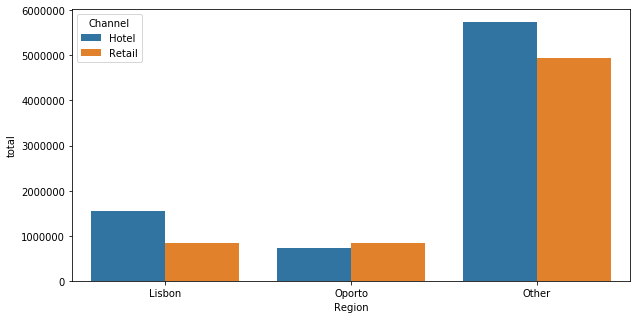

In [7]:
plt.figure(figsize=(10,5))
dfta2=pd.DataFrame(dft.groupby(["Channel",'Region'],as_index=False).sum())
sns.barplot(dfta2["Region"],dfta2["total"],hue=dfta2["Channel"]);

In [8]:
dfta2=dft.groupby(["Channel",'Region'],as_index=True).sum().sort_values(by="total",ascending=False).head(2)
dfta2

,,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
Channel,Region,,,,,,,
Hotel,Other,2928269,735753,820101,771606,165990,320358,5742077
Retail,Other,1032308,1153006,1675150,158886,724420,191752,4935522


In [9]:
dfta2=dft.groupby(['Channel','Region'],as_index=True).sum().sort_values(by="total",ascending=True).head(2)
dfta2

,,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
Channel,Region,,,,,,,
Hotel,Oporto,326215,64519,123074,160861,13516,30965,719150
Retail,Oporto,138506,174625,310200,29271,159795,23541,835938


## Insights 
Based on the above table and graph, Other Channel spends more and Retail channel spends less
Based on the above table and graph, Other Region spends more and Oporto region spends less

# 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

## Approach
To understand the behaviour of these items, we should first the mean, median, standard deviation,max and min which will help us understand the spred of the data. Additionally identifying the total of each variety will also help get details around knowing the total expenditure of each item.


In [147]:
dft2=df1.drop("Buyer/Spender",axis=1)
dft2= dft2.groupby(['Channel'],as_index=True)
display(dft2.sum())
#display(dft2.mean().round())
#display(dft2.std().round())
#display(dft2.min())
display(dft2.describe().T)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


Channel                         Hotel        Retail
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

## Insights
Fresh, Frozen and Delicatessan for both Channels seem to have a wide spread as the Standard deviation is more than Mean. Milk and Detergents_Paper for Hotel channel have wide spread as SD is more than mean.  For Hotel Channel,  Fresh variety has the maximum mean and for Retail channel, Grocery seem to have the maximum mean. Minimum values for Fresh, Grocery, Detergents and Delicatessen are the same across Hotel Channel. The minimum value across retail for each of the varieties are largely varied.

In [148]:
dft2=df1.drop("Buyer/Spender",axis=1)
dft22=df1.drop("Buyer/Spender",axis=1)
dft2= dft2.groupby(['Channel','Region'],as_index=True)
display(dft2.sum().round())
dft22= dft22.groupby(['Region'],as_index=True)
#display(dft22.mean().round())
#display(dft2.max())
#display(dft2.min())
#display(dft2.median())
display(dft2.describe().T)

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
Hotel   Lisbon   761233   228342   237542  184512             56081   
        Oporto   326215    64519   123074  160861             13516   
        Other   2928269   735753   820101  771606            165990   
Retail  Lisbon    93600   194112   332495   46514            148055   
        Oporto   138506   174625   310200   29271            159795   
        Other   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Channel Region                
Hotel   Lisbon         70632  
        Oporto         30965  
        Other         320358  
Retail  Lisbon         33695  
        Oporto         23541  
        Other         191752

Channel                        Hotel                               \
Region                        Lisbon        Oporto          Other   
Fresh            count     59.000000     28.000000     211.000000   
                 mean   12902.254237  11650.535714   13878.052133   
                 std    12342.008901   8969.362752   14746.572913   
                 min      514.000000      3.000000       3.000000   
                 25%     4437.500000   4938.250000    3702.500000   
                 50%     8656.000000   9787.000000    9612.000000   
                 75%    18135.000000  17031.500000   18821.000000   
                 max    56083.000000  32717.000000  112151.000000   
Milk             count     59.000000     28.000000     211.000000   
                 mean    3870.203390   2304.250000    3486.981043   
                 std     4298.321195   2968.628697    4508.505269   
                 min      258.000000    333.000000      55.000000   
                 25%     1071.000000   1146.000000    1188.500000   
                 50%     2280.000000   1560.500000    2247.000000   
                 75%     4995.500000   2344.750000    4205.000000   
                 max    23527.000000  16784.000000   43950.000000   
Grocery          count     59.000000     28.000000     211.000000   
                 mean    4026.135593   4395.500000    3886.734597   
                 std     3629.644143   3048.298815    3593.506056   
                 min      489.000000   1330.000000       3.000000   
                 25%     1620.000000   2373.750000    1666.000000   
                 50%     2576.000000   3352.000000    2642.000000   
                 75%     5172.500000   5527.500000    4927.500000   
                 max    16966.000000  13626.000000   21042.000000   
Frozen           count     59.000000     28.000000     211.000000   
                 mean    3127.322034   5745.035714    3656.900474   
                 std     3276.460124  11454.478518    4956.590848   
                 min       91.000000    264.000000      25.000000   
                 25%      966.000000    962.250000     779.000000   
                 50%     1859.000000   2696.500000    1960.000000   
                 75%     4479.000000   4617.000000    4542.500000   
                 max    18711.000000  60869.000000   36534.000000   
Detergents_Paper count     59.000000     28.000000     211.000000   
                 mean     950.525424    482.714286     786.682464   
                 std     1305.907616    425.310506    1099.970640   
                 min        5.000000     15.000000       3.000000   
                 25%      237.000000    182.750000     176.500000   
                 50%      412.000000    325.000000     375.000000   
                 75%      874.000000    707.000000     948.500000   
                 max     5828.000000   1679.000000    6907.000000   
Delicatessen     count     59.000000     28.000000     211.000000   
                 mean    1197.152542   1105.892857    1518.284360   
                 std     1219.945304   1056.778800    3663.183304   
                 min        7.000000     51.000000       3.000000   
                 25%      374.000000    567.250000     378.500000   
                 50%      749.000000    883.000000     823.000000   
                 75%     1621.500000   1146.000000    1582.000000   
                 max     6854.000000   5609.000000   47943.000000   

Channel                       Retail                              
Region                        Lisbon        Oporto         Other  
Fresh            count     18.000000     19.000000    105.000000  
                 mean    5200.000000   7289.789474   9831.504762  
                 std     5415.521495   6867.934548   9635.394129  
                 min       18.000000    161.000000     23.000000  
                 25%     2378.250000   2368.000000   2343.000000  
                 50%     2926.000000   6468.000000   7362.000000  
             

## Insights
Fresh variety has maximum mean across all the regions and Delicatessan variety has lowest mean across all regions. All varieites show similar trends in mean values across regions. Milk grocery Frozen and detergent across the regions have scattered spread as their standard deviation is more than mean. Minimum value for Grocery Fresh Delicatessen and Detergents are the same in Other region while they differ across varieties in the other two regions

# 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behaviour?

## Approach

To find the measure of variability, it is important to determine co-efficient of variantion, this will helps us understand the dispersion of the data.

In [12]:
dft3=df1.drop("Buyer/Spender",axis=1)
dft3= (dft3.std()/dft3.mean()).sort_values(ascending=False)*100
dft3

Delicatessen        184.940690
Detergents_Paper    165.464714
Frozen              158.033238
Milk                127.329858
Grocery             119.517437
Fresh               105.391792
dtype: float64

## Insights 

Delicatessen has the maximum value for co efficient of variance and hence shows the most inconsistent behavior while Fresh variety has a co efficient of variance of 105.39 which shows the least inconsistent behavior among the given varieties. 

# 1.4 Are there any outliers in the data?

## Approach

Outliers are determined by using the following formula
Q3+ 1.5 IQR < Outliers< Q1- 1.5 IQR. 
It is important to determine co-efficient of variantion, this will help us understand the dispersion of the data.

In [13]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df4=pd.DataFrame(((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))
df4[df4.iloc[:][0]!=0]


,0
Frozen,43
Detergents_Paper,30
Milk,28
Delicatessen,27
Grocery,24
Fresh,20


## Insights
Frozen has the maximum number of outliers while fresh has the least number of outliers

# 1.5 On the basis of this report, what are the recommendations?

The wholesale distributor might need this information to store products of different varieties at his inventory based on the spendings recorded by each of the retailers across different channels and regions. The following insights tell us which channel and region need more products and which are the products that are to be stores in surplus at the inventory.

The Hotel channel spends more than the retail. Within the retail channel, the "Other' region spends more than the other two regions. The region that spends the least is the "Oporto". However, under Hotel channel, "Oporto" records least spending overall. There are significantly more number of retailers in the Hotel channel than in the Retail. The average spending on each of the 6 varities of products are availble mostly varied and wide spread.

The average spending on detergent is the least for Hotel Channel but the same variety for Retail channel has more average spending than other varieities. This could be due to outliers detected and the higher co-efficient of variance. Hence it is important to identify the retailers in the regions who have had unusual spendings on this product and be able to stock accordingly. 

Fresh variety and Grocery follow a similar trends across channels.

Grocery, Milk, Fresh and detergent have more total spendings and their mean is also high for retail comparitively across all regions. This could imply that maximum spendings for retail are due to these varieites and hence we should store surplus of this variety for retail channel. Higher mean and more outliers indicate that certain retailers have had more demand for these products and hence we should stock these quantities adequately. Fresh , groceries and milk are also perishable and are in high demand through out the year.

Fresh variety, milk and grocery are more sold in the Hotel channel with higher mean , since Hotel channel has more spendings and more retailers compared to retail channel, inventory should account for outliers and store surplus of these three varieties to supply to this channels. 

 "Other" region has fairly more spendings across both the channels. Hence there is a more demand for goods in this region.

Since the outliers exist for all the products and since the data has a wide spread, it may not be completely safe to go by the mean numbers. For each of the regions and channels, we should maintain atleast a surplus for  Fresh Milk Grocery Frozen Detergent Delicatessan products based on their median values as given above. . 

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## Approach

Contingency tables are framed using subset of main data. 

In [14]:
d2=pd.read_csv("Survey.csv")
d2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


# 2.1.1. Gender and Major

In [15]:
d21= pd.DataFrame(pd.crosstab(d2['Gender'],d2['Major'],margins = True))
d21

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


# 2.1.2. Gender and Grad Intention

In [153]:
d23=pd.crosstab(d2['Gender'],d2["Grad Intention"],margins = True)
d23

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


# 2.1.3. Gender and Employment

In [154]:
d22=pd.crosstab(d2['Gender'],d2["Employment"],margins = True)
d22

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


# 2.1.4. Gender and Computer

In [18]:
d24=pd.crosstab(d2['Gender'],d2["Computer"],margins = True)
d24

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:


# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

## Approach
Probablity of an outcome =( Desired outcome/total number of outcomes)

In [20]:
total=d2['Gender'].count()
malecount=d2[d2['Gender'].str.contains("Male")]
mc=malecount['Gender'].count()
mp=(mc/total).round(3)
print("Probablity that a randomly selected student is a Male is:", mp)


Probablity that a randomly selected student is a Male is: 0.468


# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [21]:
femalecount=d2[d2['Gender'].str.contains("Female")]
fc=femalecount['Gender'].count()
fp=(fc/total).round(3)
print("Probablity that a randomly selected student is a Female is:", fp)


Probablity that a randomly selected student is a Female is: 0.532


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

## Approach 
Conditional Probablity Formula for questions 2.3.1 and 2.3.2 are 

*Probablity P (choosing a major A|male)=Probablity P(choosing male and choosing a major A)/Probablity P(choosing a male)


*Probablity P (choosing a major A|female)=Probablity P(choosing female and choosing a major A)/Probablity P(choosing a female)

In [149]:
mp
pam=4/62
pagm= (pam/mc).round(3)
print("Probablity of Accounting given the student is Male is:", pagm)
pcism=1/62
pcisgm=(pcism/mp).round(3)
print("Probablity of CIS given the student is Male is:", pcisgm)
pem=4/62
pegm=(pem/mp).round(3)
print("Probablity of Economics/Finance given the student is Male is:", pegm)
pibm=2/62
pibgm=(pibm/mp).round(3)
print("Probablity of International Business given the student is Male is:", pibgm)
pmm=6/62
pmgm=(pmm/mp).round(3)
print("Probablity of Management given the student is Male is:", pmgm)
pom=4/62
pogm=(pom/mp).round(3)
print("Probablity of Other given the student is Male is:", pogm)
prm=5/62
prgm=(prm/mp).round(3)
print("Probablity of Retailing/Marketing given the student is Male is:", prgm)
pum=3/62
pugm=(pum/mp).round(3)
print("Probablity of Undecided given the student is Male is:", pugm)

#total= pagm+pcisgm+pegm+pibgm+pmgm+pogm+prgm+pugm
#total

Probablity of Accounting given the student is Male is: 0.002
Probablity of CIS given the student is Male is: 0.034
Probablity of Economics/Finance given the student is Male is: 0.138
Probablity of International Business given the student is Male is: 0.069
Probablity of Management given the student is Male is: 0.207
Probablity of Other given the student is Male is: 0.138
Probablity of Retailing/Marketing given the student is Male is: 0.172
Probablity of Undecided given the student is Male is: 0.103


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [25]:
fp
#Probablity of acounting/female=probablity of female and acounting/probablity of female
paf=3/62
pagf= (pam/fp).round(3)
print("Probablity of Accounting given the student is Female is:", pagf)
pcisf=3/62
pcisgf=(pcisf/fp).round(3)
print("Probablity of CIS given the student is Female is:", pcisgf)
pef=7/62
pegf=(pef/fp).round(3)
print("Probablity of Economics/Finance given the student is Female is:", pegf)
pibf=4/62
pibgf=(pibf/fp).round(3)
print("Probablity of International Business given the student is Female is:", pibgf)
pmf=4/62
pmgf=(pmf/fp).round(3)
print("Probablity of Management given the student is Female is:", pmgf)
pof=3/62
pogf=(pof/fp).round(3)
print("Probablity of Other given the student is Female is:", pogf)
prf=9/62
prgf=(prf/fp).round(3)
print("Probablity of Retailing/Marketing given the student is Female is:", prgf)
puf=0/62
pugf=(puf/fp).round(3)
print("Probablity of Undecided given the student is Female is:", pugf)

#total=pagf+pcisgf+pegf+pibgf+pmgf+pogf+prgf+pugf
#total


Probablity of Accounting given the student is Female is: 0.121
Probablity of CIS given the student is Female is: 0.091
Probablity of Economics/Finance given the student is Female is: 0.212
Probablity of International Business given the student is Female is: 0.121
Probablity of Management given the student is Female is: 0.121
Probablity of Other given the student is Female is: 0.091
Probablity of Retailing/Marketing given the student is Female is: 0.273
Probablity of Undecided given the student is Female is: 0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:


# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.


## Approach 

Probabality of student who intends to graduate and is a male = P ( Male and Intends to graduate)

In [151]:
p=(17/62)
print("Probablity of student being male and intending to graduate is", p)

Probablity of student being male and intending to graduate is 0.27419354838709675


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

## Approach 

Probabality of student who has desktop and tablet and is a female  = P ( Female and has desktop and tablet) 

In [152]:

p=(4/62)
print("Probablity of student being female and doesnt have a laptop is", p)

Probablity of student being female and doesnt have a laptop is 0.06451612903225806


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:


# 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?


## Approach 
P(A or B)= P(A)+P(B)-P(AnB)

where

A= choosing a male
B=full time employment

In [155]:
p1=29/62
p2=10/62
p3=7/62
p=p1+p2-p3
print("Probablity of student being male or full time employed is", p)

Probablity of student being male or full time employed is 0.5161290322580645


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

## Approach

P(A|B)= Probablity ( female and major in IB)+(female and major in managment )/P( female)

In [156]:
p1= 4/62
p2=4/62
p3=33/62
p=(p1+p2)/p3
print("Probablity of student being female with masters in IB or Management is", p)

Probablity of student being female with masters in IB or Management is 0.24242424242424243


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?


## Approach
 Grad Intention column should contain only Yes or No. Hence we add a str.contain condition and frame the contingency table.

In [34]:
d261=d2[d2['Grad Intention'].str.contains("Yes|No")]
d261=pd.crosstab(d261["Gender"],d261["Grad Intention"],margins= True)
d261

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


## Insights
The are independent events as knowing the outcome of the gender doesnt give any information anout grad intention. Hence it is independent

# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

## Approach 
dataframe with GPA less than 3 gives 17 outcomes and total is 62

In [159]:
d271=d2[d2["GPA"]<3]
do= d271["GPA"].count()
to=d2["GPA"].count()
p= do/to
print("The probablity of chosing a student randomly with his/her GPA less than 3 is", p)

The probablity of chosing a student randomly with his/her GPA less than 3 is 0.27419354838709675


# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.


## Approach 

Probablity of earning 50 or more when gender is male

P(A|B)= P(AnB)/P(B)

P(AnB)= probablity ( Earns 50 and above and Male)= computed by getting dataframe with salary more than or equal to 50 and gender as Male wrt total outcomes

In [76]:
d272=d2[(d2.Salary>=50) & (d2.Gender=="Male")]
do=d272["Salary"].count()
to=d2["Salary"].count()
#probablity of picking a male and who earns 50 and above 
p1=do/to
d2722=d2[(d2.Salary>=50) & (d2.Gender=="Female")]
do1=d2722["Salary"].count()
p2=do1/to

In [82]:
mp
fp
#Probablity (earn 50 or more| male)=Probability( 50 and more and male)/Probablity(Male)
pgm= p1/mp
pgf=p2/fp
print("The probablity of chosing a candidate who earns 50 or more given male is", pgm)
print("The probablity of chosing a candidate who earns 50 or more given female is", pgf)

The probablity of chosing a candidate who earns 50 or more given male is 0.4824924179762889
The probablity of chosing a candidate who earns 50 or more given female is 0.5457191365510551


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

## Approach

plot the distplot and boxplot to see how each graph looks like. Normal distrubtion will be symmetric with mean and median at the centre of districtuion. Box plot will have equidistant space in case of normal distribution.

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


<Figure size 720x576 with 0 Axes>

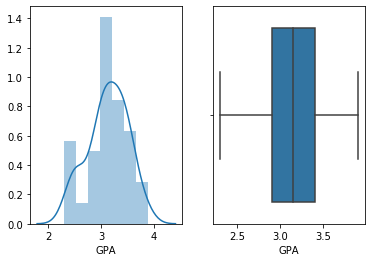

In [94]:
fig, ax =plt.subplots(1,2)
sns.distplot(d2["GPA"],hist=True,ax=ax[0])
sns.boxplot(d2["GPA"],ax=ax[1])
fig.show()

GPA follows a normal distribution as you see in the above graphs

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


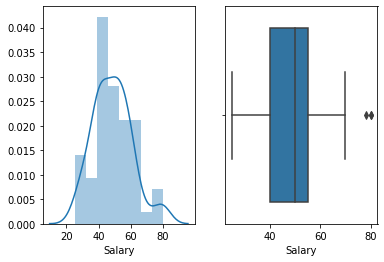

In [95]:
fig, ax =plt.subplots(1,2)
sns.distplot(d2["Salary"],hist=True,ax=ax[0])
sns.boxplot(d2["Salary"],ax=ax[1])
fig.show()

Since the median is not exactly to to the centre, and it has bi modal tendency, this is not a normal distribution

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


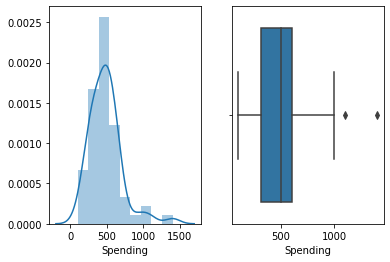

In [96]:
fig, ax =plt.subplots(1,2)
sns.distplot(d2["Spending"],hist=True,ax=ax[0])
sns.boxplot(d2["Spending"],ax=ax[1])
fig.show()

This might be a left skewed graph based on the box plot

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


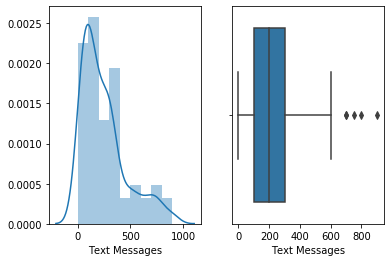

In [97]:
sfig, ax =plt.subplots(1,2)
sns.distplot(d2["Text Messages"],hist=True,ax=ax[0])
sns.boxplot(d2["Text Messages"],ax=ax[1])
fig.show()

This could be a right skewed based on the histogram representation

## Insights

Hence out the given graphs, the GPA shows a normal distribution while Salary shows bi-modal tendency, spending is left skewed and Text Messages are right skewed

# 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

## Approach 

The hypothesis is framed for the first question 

* $H_0$: $\mu$ $>=$ 0.35  The mean moisture is greater than or equal to the permisible limit
* $H_A$: $\mu$ $\neq$ 0.35  The mean moisture is less than the permissible limit
* $\alpha$ is 0.05 Significance

We use 1 sample T-Test as these columns represent sample data and we have no access to population mean. Hence we frame the hypothesis and then check for 1 sample T-test for each sets of data to validate our hypothesis. 
In our case, we would like to check if these samples are within the permissable limit and limit should be lesser than 3.5. Hence my null hypothesis becomes mean greater than or equal to 3.5 as null hypotheis should be free of inequality signs. 

In [160]:
d3=pd.read_csv("shingles.csv")
d3

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [161]:
d3.isna().sum()

A    0
B    5
dtype: int64

* $H_0$: $\mu$ $>=$ 0.35  The mean moisture is greater than or equal to the permisible limit
* $H_A$: $\mu$ $\neq$ 0.35  The mean moisture is less than the permissible limit
* $\alpha$ is 0.05 Significance

In [165]:
tstat, p_val = ttest_1samp(d3["A"], 0.35)
print("The T-statistic value is", tstat)
print("The p value is ", p_val)

The T-statistic value is -1.4735046253382782
The p value is  0.14955266289815025


In [166]:
tsta1, p1_val = ttest_1samp(d3["B"], 0.35,nan_policy = 'omit')
print("The T-statistic value is", tsta1)
print("The P value is", p1_val)

The T-statistic value is -3.1003313069986995
The P value is 0.004180954800638365


In [167]:
if p_val < 0.05: 
    print("We have evidence to reject the null hypothesis for sample A since p value < Level of significance")
    print("Hence Sample A is within the permissbile limit")
else:
    print("We have no evidence to reject the null hypothesis for sample A since p value > Level of significance")
    print("Hence Sample A is not within the permissible limit") 
    
if p1_val < 0.05: 
    print("We have evidence to reject the null hypothesis for sample B since p value < Level of significance")
    print ("Hence Sample B is within the permissbile limit")
else:
    print('We have no evidence to reject the null hypothesis for sample B since p value > Level of significance')
    print( "Hence Sample B is within the permissbile limit") 
    
    

We have no evidence to reject the null hypothesis for sample A since p value > Level of significance
Hence Sample A is not within the permissible limit
We have evidence to reject the null hypothesis for sample B since p value < Level of significance
Hence Sample B is within the permissbile limit


# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

## Approach
 Since the question is to check if the population mean for both the data sets are equal, we assume that these data sets are independent and conduct a 2 sample T test to find the P value by framing the hypotheiss as follows:

* $H_0$: $\mu$a $=$ $\mu$b  The sample mean of A and sample mean of B are equal
* $H_A$: $\mu$a $\neq$ $\mu$b The sample mean of A and sample mean of B are not equal
* $\alpha$ is 0.05 Significance

In [168]:
t_statistic, p_value  = ttest_ind(d3['A'],d3['B'],nan_policy="omit")
print('The T statistics value is',t_statistic)    
print('The p Value is',p_value)    

The T statistics value is 1.2896282719661123
The p Value is 0.2017496571835306


In [169]:
alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean for shingles A and B are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean for shingles A and B are same.')

We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that mean for shingles A and B are same.
